# PROJEKT1 IOwADC 

### Karol Widuch + Konrad Kalita
#### Breast Cancer + regresja logistyczna + precyzja

imports

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    'breast-cancer.data', sep=',',
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
)

imp = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imp.fit_transform(df), columns=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])   
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Wartości kolumn:
   1. Class: 
           no-recurrence-events, recurrence-events
   2. age: 
           10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: 
           lt40, ge40, premeno.
   4. tumor-size: 
          0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 
           0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: 
           yes, no.
   7. deg-malig: 
           1, 2, 3.
   8. breast: 
           left, right.
   9. breast-quad: 
           left-up, left-low, right-up,	right-low, central.
   10. irradiat:
           yes, no.

In [3]:
for col in df.columns:
    print(df[col].value_counts())
    print("##############################")

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64
##############################
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64
##############################
premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64
##############################
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64
##############################
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64
##############################
no     222
yes     56
?        8
Name: node-caps, dtype: int64
##############################
2    130
3     85
1     71
Name: deg-malig, dtype: int64
##############################
left     152
right    134
Name: breast, dtype: int64
##############################
left_low     110
left_up       97
right_up

In [4]:
df_dummies = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns)
df_dummies.head()

,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [5]:
df_dummies.drop("Class_no-recurrence-events", axis=1, inplace=True)
df_dummies.drop("breast_left", axis=1, inplace=True)
df_dummies.drop("irradiat_yes", axis=1, inplace=True)

df_dummies.shape

(286, 42)

In [6]:
df_dummies.describe().round(2)

,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,deg-malig_2,deg-malig_3,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no
count,286.00,286.00,286.00,286.00,286.00,286.0,286.00,286.00,286.00,286.00,...,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00
mean,0.30,0.00,0.13,0.31,0.34,0.2,0.02,0.45,0.02,0.52,...,0.45,0.30,0.47,0.00,0.07,0.38,0.34,0.08,0.12,0.76
std,0.46,0.06,0.33,0.47,0.47,0.4,0.14,0.50,0.15,0.50,...,0.50,0.46,0.50,0.06,0.26,0.49,0.47,0.28,0.32,0.43
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,1.00,0.00,0.00,1.00,1.00,0.0,0.00,1.00,0.00,1.00,...,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [7]:
y = df_dummies['Class_recurrence-events']
X = df_dummies.drop('Class_recurrence-events', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [9]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.6724137931034483

In [10]:
def check(splits):
    kf = KFold(n_splits=splits, shuffle=True)
    scores = []
    lr = linear_model.LogisticRegression()
    
    for i, [train_idx, valid_idx] in enumerate(kf.split(X)):
        X_t_f, X_v_f = X.iloc[train_idx], X.iloc[valid_idx]
        y_t_f, y_v_f = y.iloc[train_idx], y.iloc[valid_idx]
        lr.fit(X_t_f, y_t_f)
        scores.append(lr.score(X_v_f, y_v_f))
        print(f"{i+1}: \t{lr.score(X_test, y_test)}")
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,splits+1), scores)
    plt.title("scores")
    plt.xlabel(f"{splits}-cross validation")

1: 	0.7068965517241379
2: 	0.7241379310344828
3: 	0.7413793103448276
4: 	0.7586206896551724
5: 	0.7241379310344828
6: 	0.7241379310344828
7: 	0.7241379310344828
8: 	0.7241379310344828
9: 	0.7413793103448276
10: 	0.7413793103448276


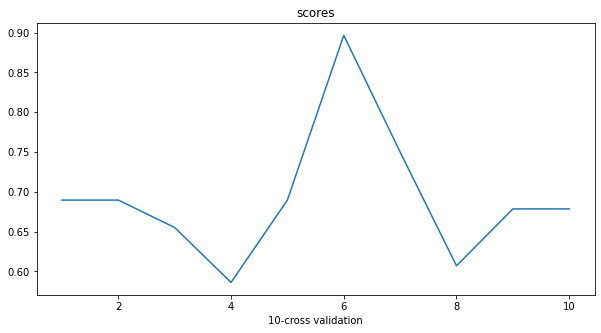

In [11]:
check(10)

In [12]:
def plot_learning_curve(estimator, X, y, cv=10, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10,10))

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

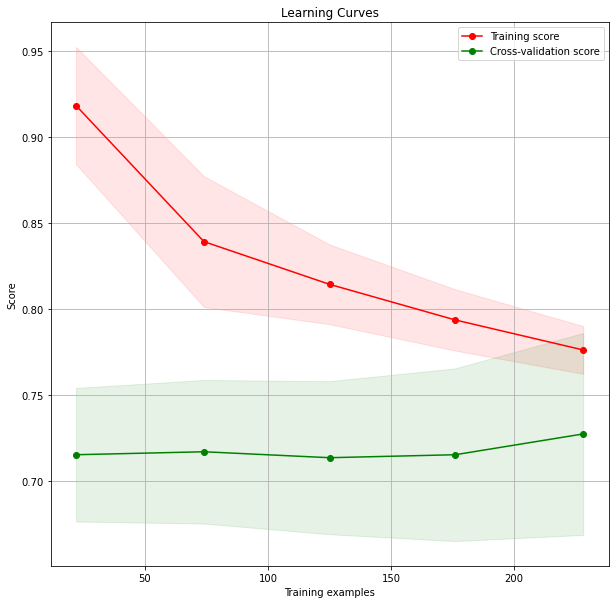

In [13]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(lr, X, y, cv=cv)

Precyzja jest miarą jakości naszego modelu. Określa jak wiele próbek określonych jako pozytywne jest trafionych poprawnie (tp/(tp+fp)).

In [14]:
def precision(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return TP/(TP+FP)